<a href="https://colab.research.google.com/github/HST0077/Financial-Engineering-Python/blob/main/Stochastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time

class Timer:
    def __init__(self):
        self.start_time = None
        self.end_time = None

    def tic(self):
        self.start_time = time.time()

    def toc(self):
        self.end_time = time.time()
        if self.start_time is None:
            print("tic() 메서드를 호출하여 시작 시간을 설정하세요.")
        else:
            elapsed_time = self.end_time - self.start_time
            print("코드 실행 시간:", elapsed_time, "초")

**정규분포 난수 생성하고 검증하기**

In [ ]:
# normal random variate
from scipy.stats import norm

# random number 생산
# 평균이 4이고 표준편차 10인 정규분포 난수 생성
D=norm.rvs(4,10,size=1000)
# 자료 검증
a,b=norm.fit(D) # a,b는 평균,표준편차
a,b**2

(4.190956592449356, 98.96989262556633)

image.png

평균:0, 분산:1
코드 실행 시간: 1.9365754127502441 초


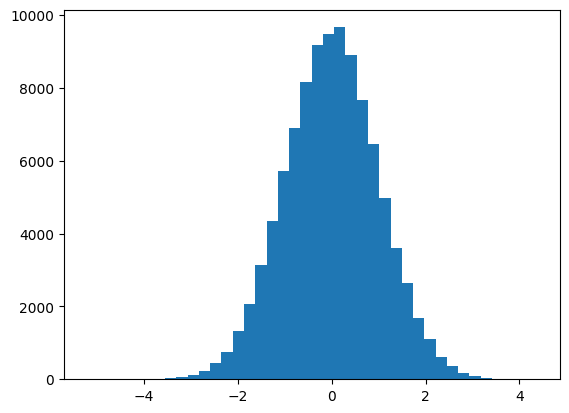

In [ ]:
timer = Timer()
timer.tic()

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sim=100000 #시뮬레이션 횟수
N=300 # 시간간격의 갯수
s=np.sqrt(1/N) # 분산을 표준편차화
# N(0,s)을 따르는 [N,sim] 크기의 정규난수 생성
dW=norm.rvs(0,s,size=[N,sim])
sumW=dW.sum(axis=0) # 각 열별로 누적합을 구함
plt.hist(sumW,bins=40) # 히스토그램으로 그리기
mu,sig=norm.fit(sumW)
print(f'평균:{0}, 분산:{1}'.format(mu,sig**2))

timer.toc()

In [ ]:
# GPU를 활용하기 위해 cupy 호출
# conda install -c conda-forge cupy
import cupy as cp
from scipy.stats import norm

def BMsum_gpu(T, sim, N_intervals):
    # T: maturity in years
    # sim: 시뮬레이션 횟수
    # N_intervals: 시간을 몇 개로 쪼갤 것인지 지정
    N = T * N_intervals  # 만기를 감안한 시간간격의 갯수
    s = cp.sqrt(1 / N_intervals)  # 분산을 표준편차화
    # N(0,s)을 따르는 [N, sim] 크기의 정규난수 생성
    dW = cp.random.normal(0, s, size=(N, sim))
    sumW = cp.sum(dW, axis=0)  # 각 열별로 누적합을 구함
    mu, sig = norm.fit(cp.asnumpy(sumW))
    return mu, sig ** 2

코드 실행 시간: 2.6111502647399902 초


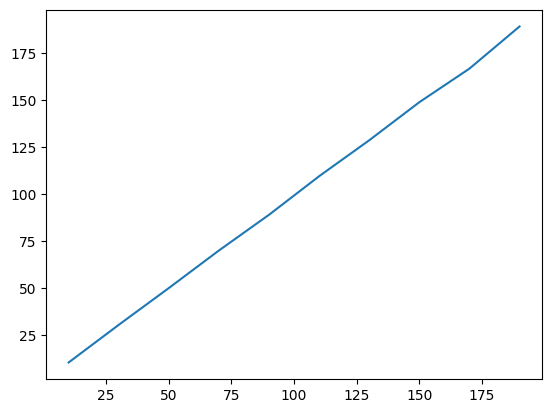

In [ ]:
timer.tic()

X=np.arange(10,201,20)
Y=np.zeros(len(X))
for i,n  in enumerate(X):
    Y[i]=BMsum_gpu(n,10000,300)[1] # 분산 값만 저장

plt.plot(X,Y)

timer.toc()

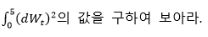

평균: 5.000141748665811 분산: 0.02675378510888252


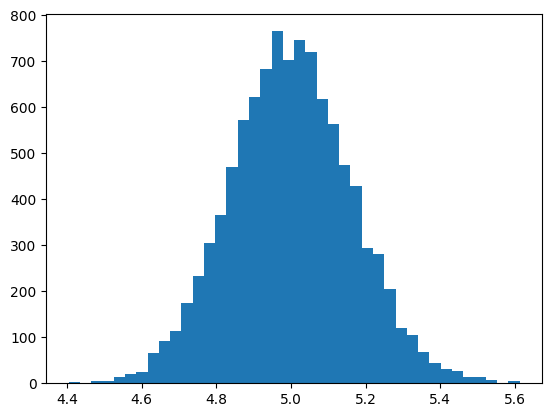

In [ ]:
import cupy as cp
from scipy.stats import norm
import matplotlib.pyplot as plt

# 만기1을 몇 개의 시간간격으로 쪼갤지 선정
N_intervals=365
sim=10000 # simulation 회수
N=5*N_intervals # 만기를 감안한 시간간격의 갯수
s=cp.sqrt(1/N_intervals) # 분산을 표준편차화
# N(0,s)을 따르는 [N,sim] 크기의 정규난수 생성
dW = cp.random.normal(0, s, size=(N, sim))
dW2=dW**2 # 각 원소를 제곱
col_sum=dW2.sum(axis=0) # 각 열별로 누적합을 구함
plt.hist(cp.asnumpy(col_sum),bins=40)
mu, sig = norm.fit(cp.asnumpy(col_sum))
print('평균:',mu, '분산:',sig**2)

In [ ]:
def BMsum2_gpu(T,sim,N_intervals):
    import cupy as cp
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    # T: maturity in years
    # sim: 시뮬레이션 횟수
    # N_intervals: 시간을 몇 개로 쪼갤 것인지 지정
    N=T*N_intervals # 만기를 감안한 시간간격의 갯수
    s=cp.sqrt(1/N_intervals) # 분산을 표준편차화
    # N(0,s)을 따르는 [N,sim] 크기의 정규난수 생성
    dW = cp.random.normal(0, s, size=(N, sim))
    dW2=dW**2 # 각 원소를 제곱
    col_sum=dW2.sum(axis=0) # 각 열별로 누적합을 구함
    mu, sig = norm.fit(cp.asnumpy(col_sum))
    return mu, sig**2

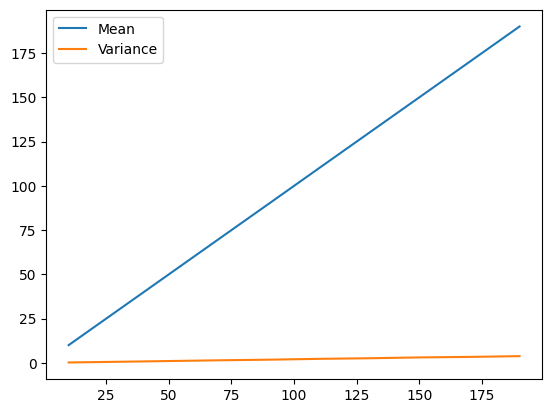

코드 실행 시간: 1.8139076232910156 초


In [ ]:
timer.tic()

X=np.arange(10,201,20)
M=np.zeros(len(X))
S=np.zeros(len(X))

for i,n  in enumerate(X):
    a,b=BMsum2_gpu(n,10000,100)
    M[i]=a #평균값 저장
    S[i]=b # 분산값 저장

plt.plot(X, M, label='Mean')
plt.plot(X, S, label='Variance')

plt.legend()
plt.show()

timer.toc()